In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
# suppress warning
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

In [10]:
df=pd.read_csv('/Users/anboguo/Desktop/ADS/Project/Data/calendar.csv')
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,21456,2021-02-05,t,$85.00,$85.00,30.0,365.0
1,59709,2021-02-05,f,$160.00,$160.00,7.0,31.0
2,59709,2021-02-06,f,$160.00,$160.00,7.0,31.0
3,59709,2021-02-07,f,$160.00,$160.00,7.0,31.0
4,59709,2021-02-08,f,$160.00,$160.00,7.0,31.0


In [8]:
data=pd.read_csv('calendar.csv')

In [9]:
data

,listing_id,date,available,price
0,2515,2018-10-01,t,$99.00
1,2515,2018-09-30,t,$89.00
2,2515,2018-09-29,t,$99.00
3,2515,2018-09-28,t,$99.00
4,2515,2018-09-27,t,$99.00
...,...,...,...,...
16182635,21178032,2017-10-06,f,NaN
16182636,21178032,2017-10-05,f,NaN
16182637,21178032,2017-10-04,t,$50.00
16182638,21178032,2017-10-03,t,$50.00


In [11]:
df=df.drop(['adjusted_price','minimum_nights','maximum_nights'],axis=1)
df.head()

,listing_id,date,available,price
0,21456,2021-02-05,t,$85.00
1,59709,2021-02-05,f,$160.00
2,59709,2021-02-06,f,$160.00
3,59709,2021-02-07,f,$160.00
4,59709,2021-02-08,f,$160.00


In [12]:
df2=pd.read_csv('/Users/anboguo/Desktop/ADS/Project/Data/Airbnb open data/calendar_detail.csv')
df2.head()

,listing_id,date,available,price
0,2515,2018-10-01,t,$99.00
1,2515,2018-09-30,t,$89.00
2,2515,2018-09-29,t,$99.00
3,2515,2018-09-28,t,$99.00
4,2515,2018-09-27,t,$99.00


In [13]:
df=df2.append(df)
df=df.dropna()
df=df.drop_duplicates()
df['date']=pd.to_datetime(df["date"])
df

,listing_id,date,available,price
0,2515,2018-10-01,t,$99.00
1,2515,2018-09-30,t,$89.00
2,2515,2018-09-29,t,$99.00
3,2515,2018-09-28,t,$99.00
4,2515,2018-09-27,t,$99.00
...,...,...,...,...
13464016,47939451,2022-01-31,f,$61.00
13464017,47939451,2022-02-01,f,$61.00
13464018,47939451,2022-02-02,f,$61.00
13464019,47939451,2022-02-03,f,$61.00


In [14]:
import re as re
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
df['price2']=df['price'].apply(lambda x: find_number(x))
num=pd.to_numeric((df.price2.str.replace(' ','')))
df=df.drop(['price','price2'],axis=1)
df['price']=num/100
df.head()

,listing_id,date,available,price
0,2515,2018-10-01,t,99.0
1,2515,2018-09-30,t,89.0
2,2515,2018-09-29,t,99.0
3,2515,2018-09-28,t,99.0
4,2515,2018-09-27,t,99.0


In [174]:
ts=pd.pivot_table(df, values='price', index=['listing_id'], columns=['date'], aggfunc=np.mean)
ts

date,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,2017-10-09,2017-10-10,2017-10-11,...,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05
listing_id,,,,,,,,,,,,,,,,,,,,,
2515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2539,150.0,150.0,150.0,150.0,99.0,99.0,150.0,150.0,150.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2595,198.0,198.0,198.0,198.0,198.0,NaN,NaN,198.0,198.0,198.0,...,159.0,159.0,159.0,159.0,159.0,159.0,159.0,159.0,159.0,NaN
3330,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3647,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48033101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.0,103.0,103.0,103.0,102.0,102.0,103.0,103.0,103.0,103.0
48033611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0
48038944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0


Text(0, 0.5, 'price')

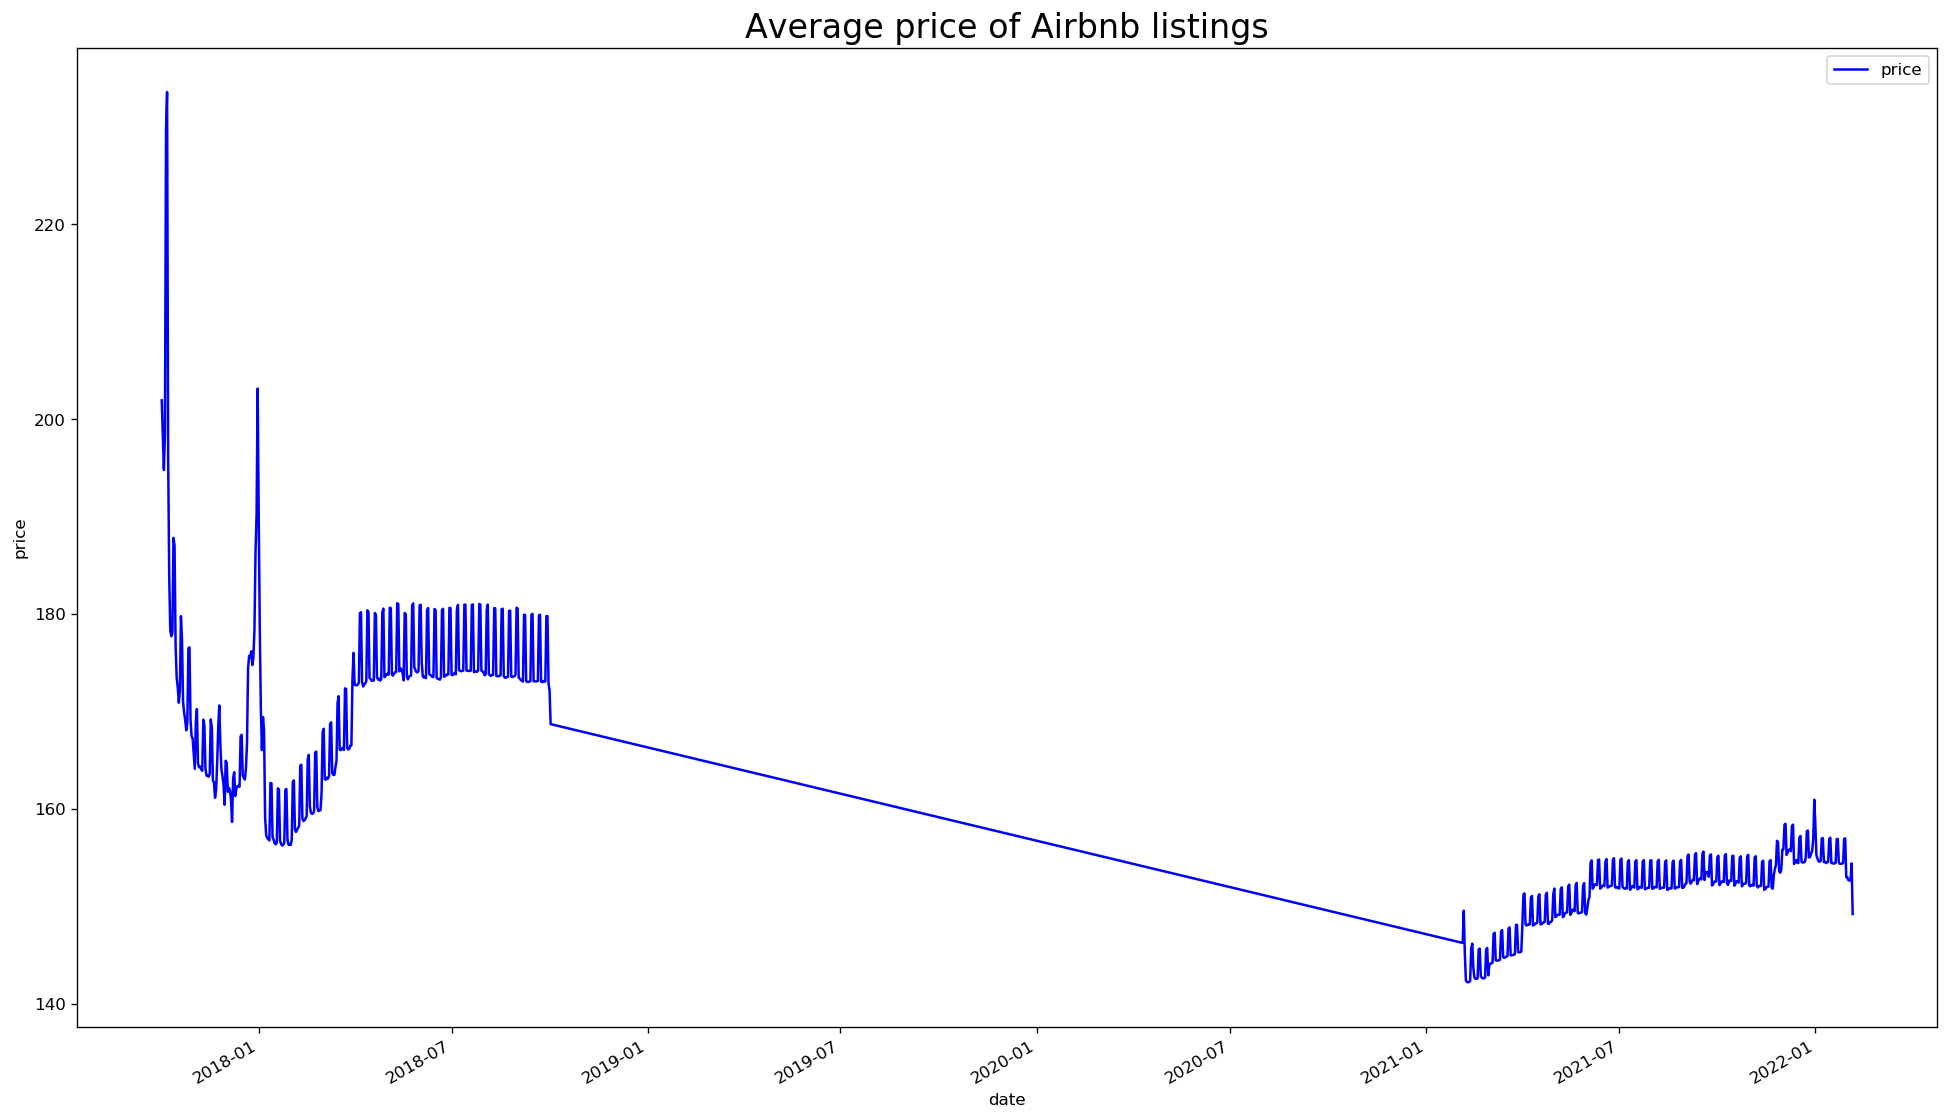

In [175]:
TS=pd.DataFrame(ts.mean())
TS['price']=ts.mean()
TS.drop(TS.columns[0],axis=1,inplace=True)
TS.plot(color='blue', figsize=(20, 12))
plt.title('Average price of Airbnb listings', fontsize=20)
plt.xlabel('date')
plt.ylabel('price')

In [177]:
TS

,price
date,
2017-10-02,201.917564
2017-10-03,198.515638
2017-10-04,194.769121
2017-10-05,198.510228
2017-10-06,229.635173
...,...
2022-02-01,152.675973
2022-02-02,152.637873
2022-02-03,152.666387


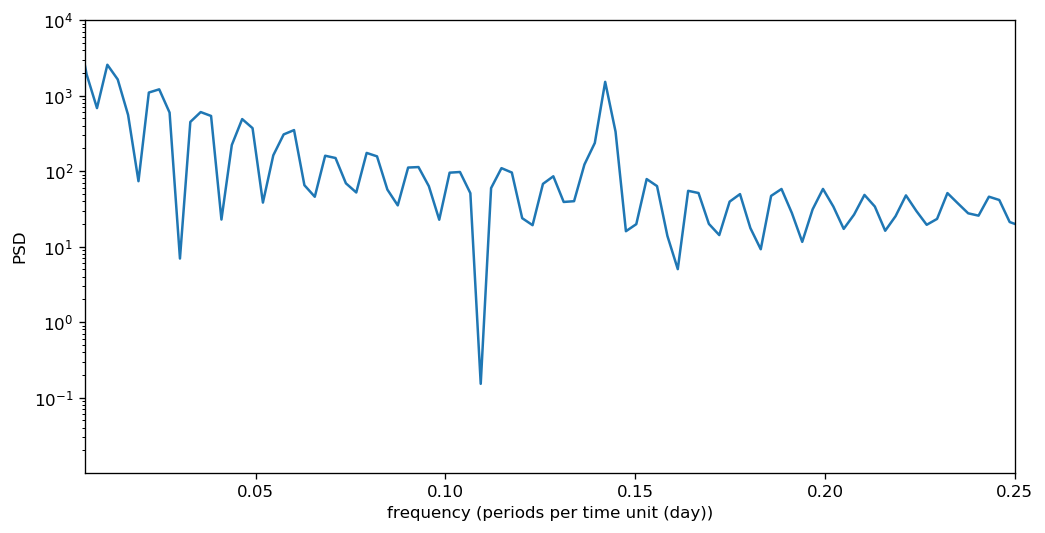

Strongest period length = 91.5


In [178]:
TS1718=TS.iloc[:366]
TS2122=TS.iloc[366:]

f, PSD = scipy.signal.periodogram(TS1718.price)
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (day))')
plt.ylabel('PSD')
plt.xlim(0.005,0.25) #show frequencies within 1/4..1/200, periods of 4-200 weeks
plt.ylim(max(PSD)/1e6,max(PSD)) #show strength up to 1e-6 of the max
#filter outputs - periods shorter than 4 years (approx 200 weeks)
PSD = PSD[f>0.005]
f = f[f>0.005]
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)]))

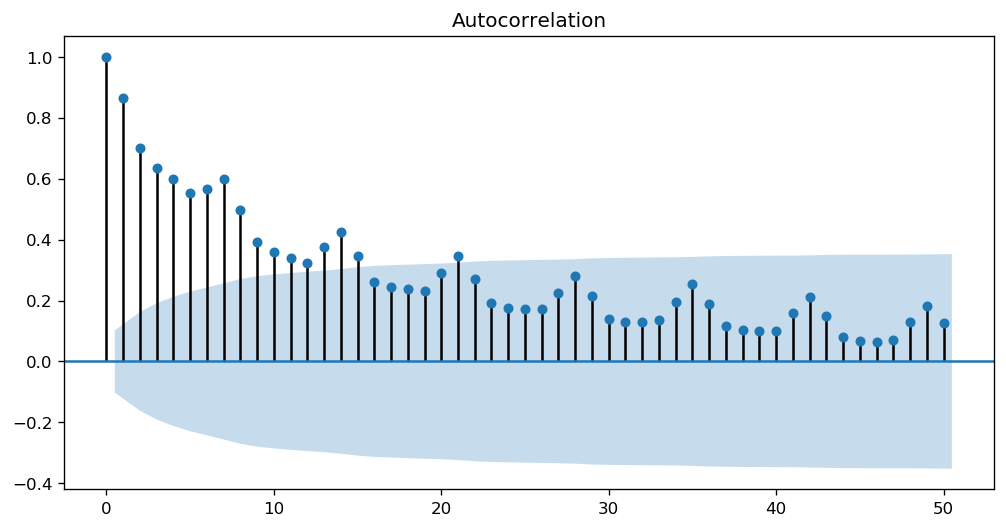

In [179]:
plot_acf(TS1718.price, lags = 50);

In [180]:
#We may add the day of week as categorical variables to represent seasonality in a linear regression mode
TS1718=TS1718.reset_index()
TS1718['DOW'] = pd.to_datetime(TS1718.date).dt.dayofweek
TS1718.head()

,date,price,DOW
0,2017-10-02,201.917564,0
1,2017-10-03,198.515638,1
2,2017-10-04,194.769121,2
3,2017-10-05,198.510228,3
4,2017-10-06,229.635173,4


In [181]:
X = pd.concat([pd.DataFrame(range(TS1718.shape[0]),columns=['date']),pd.get_dummies(TS1718['DOW'],drop_first=False)],axis=1)
lmPrice=sm.OLS(TS1718.price,X).fit()
print (lmPrice.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     10.32
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           8.30e-12
Time:                        20:01:57   Log-Likelihood:                -1298.1
No. Observations:                 366   AIC:                             2612.
Df Residuals:                     358   BIC:                             2643.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
date           0.0210      0.004      4.988      0.0

In [182]:
lm=sm.OLS(TS1718.price,sm.add_constant(TS1718.index)).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     22.60
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           2.88e-06
Time:                        20:02:00   Log-Likelihood:                -1320.8
No. Observations:                 366   AIC:                             2646.
Df Residuals:                     364   BIC:                             2653.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.7024      0.934    179.467      0.0

(160, 175)

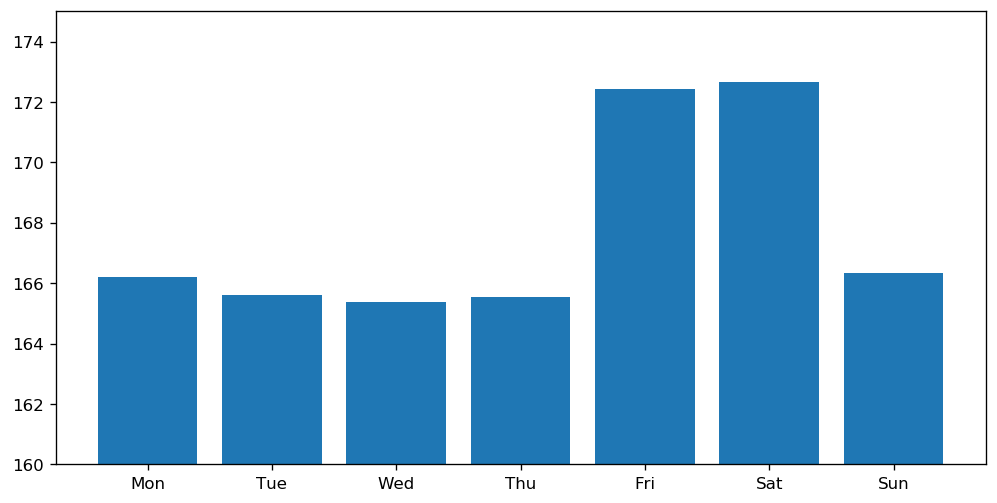

In [183]:
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 
        lmPrice.params[1:].tolist())
plt.ylim([160,175])

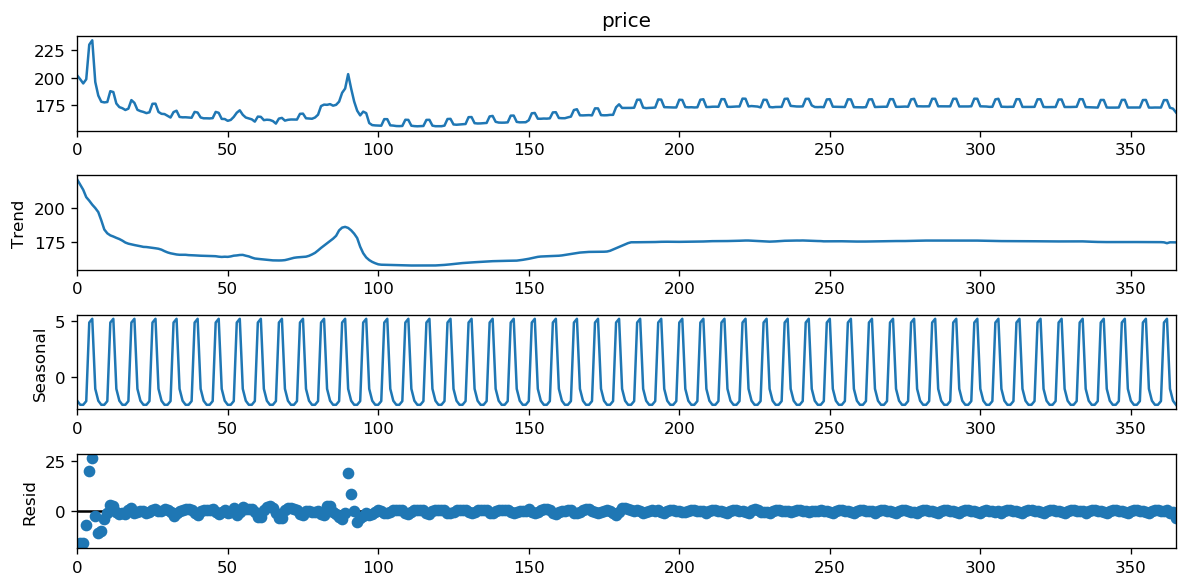

In [184]:
dailyDecomp = seasonal_decompose(TS1718['price'], model='additive', freq = 7, extrapolate_trend='freq')
fig = dailyDecomp.plot()

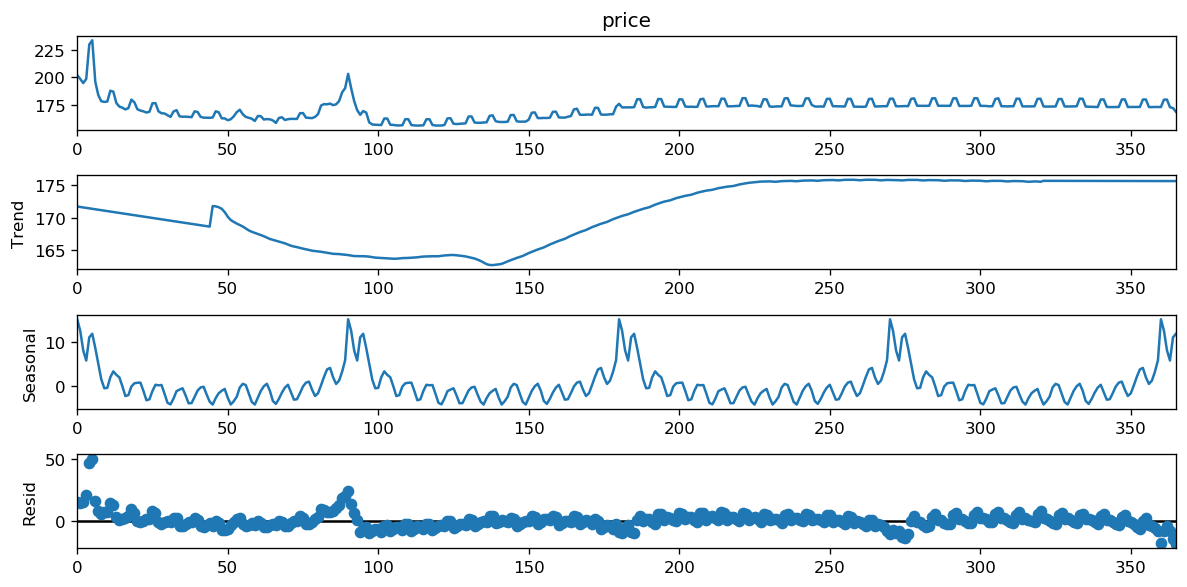

In [185]:
dailyDecomp = seasonal_decompose(TS1718['price'], model='additive', freq = 90, extrapolate_trend='freq')
fig = dailyDecomp.plot()

In [186]:
TS=TS.reset_index()
TS['date'] = pd.to_datetime(TS.date)
TS['DOW'] = pd.to_datetime(TS.date).dt.dayofweek
Xtot = pd.concat([pd.DataFrame(range(TS.shape[0]),columns=['date']),pd.get_dummies(TS['DOW'],drop_first=False)],axis=1)
y = lmPrice.predict(Xtot)

In [192]:
TS.date = pd.to_datetime(TS.date)
TS.date

0     2017-10-02
1     2017-10-03
2     2017-10-04
3     2017-10-05
4     2017-10-06
         ...    
728   2022-02-01
729   2022-02-02
730   2022-02-03
731   2022-02-04
732   2022-02-05
Name: date, Length: 733, dtype: datetime64[ns]

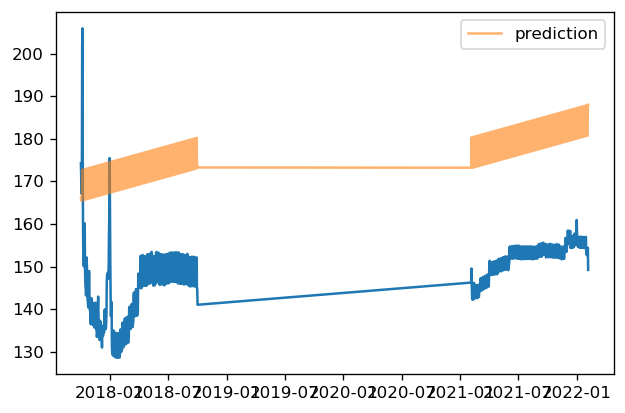

In [207]:
plt.plot(TS.date,TS.price)
plt.plot(TS.date,y,label='prediction',alpha=0.6)
plt.legend()

In [197]:
y2=pd.DataFrame(TS)
y2['pre']=y
y2=y2.iloc[366:]
y2['impact']=y2['pre']-y2['price']
y2.impact.mean()

27.660352855037463

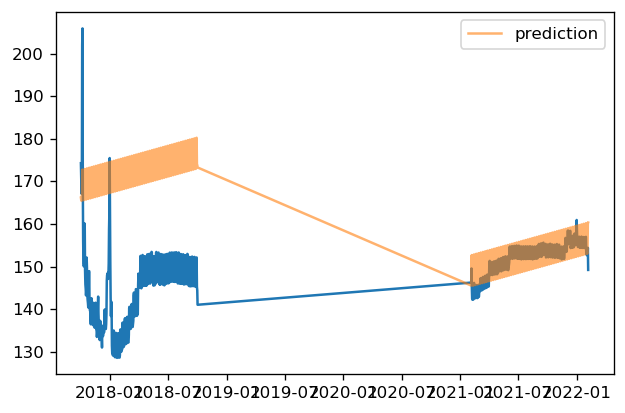

In [208]:
y2=pd.DataFrame(TS)
y2['pre']=y
y2['pre'].iloc[366:]=y2['pre'].iloc[366:]-27.66
plt.plot(TS.date,TS.price)
plt.plot(TS.date,y2.pre,label='prediction',alpha=0.6)
plt.legend()

In [199]:
print('In sample R2 is', r2_score(TS.price[:366],y2.pre[:366]))
print('Out of sample R2 is', r2_score(TS.price[366:],y2.pre[366:]))

In sample R2 is 0.16797354633593897
Out of sample R2 is 0.49943857958440074


In [200]:
TS['price'].iloc[:366]=TS['price'].iloc[:366]-27.66

In [201]:
from statsmodels.tsa.stattools import adfuller

series=TS['price']
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.704897
p-value: 0.073195
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [202]:
print('1st order differencing')
series=TS['price'].diff()
result = adfuller(series.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('2nd order differencing')
series=TS['price'].diff().diff()
result = adfuller(series.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

1st order differencing
ADF Statistic: -6.551318
p-value: 0.000000
2nd order differencing
ADF Statistic: -11.994548
p-value: 0.000000


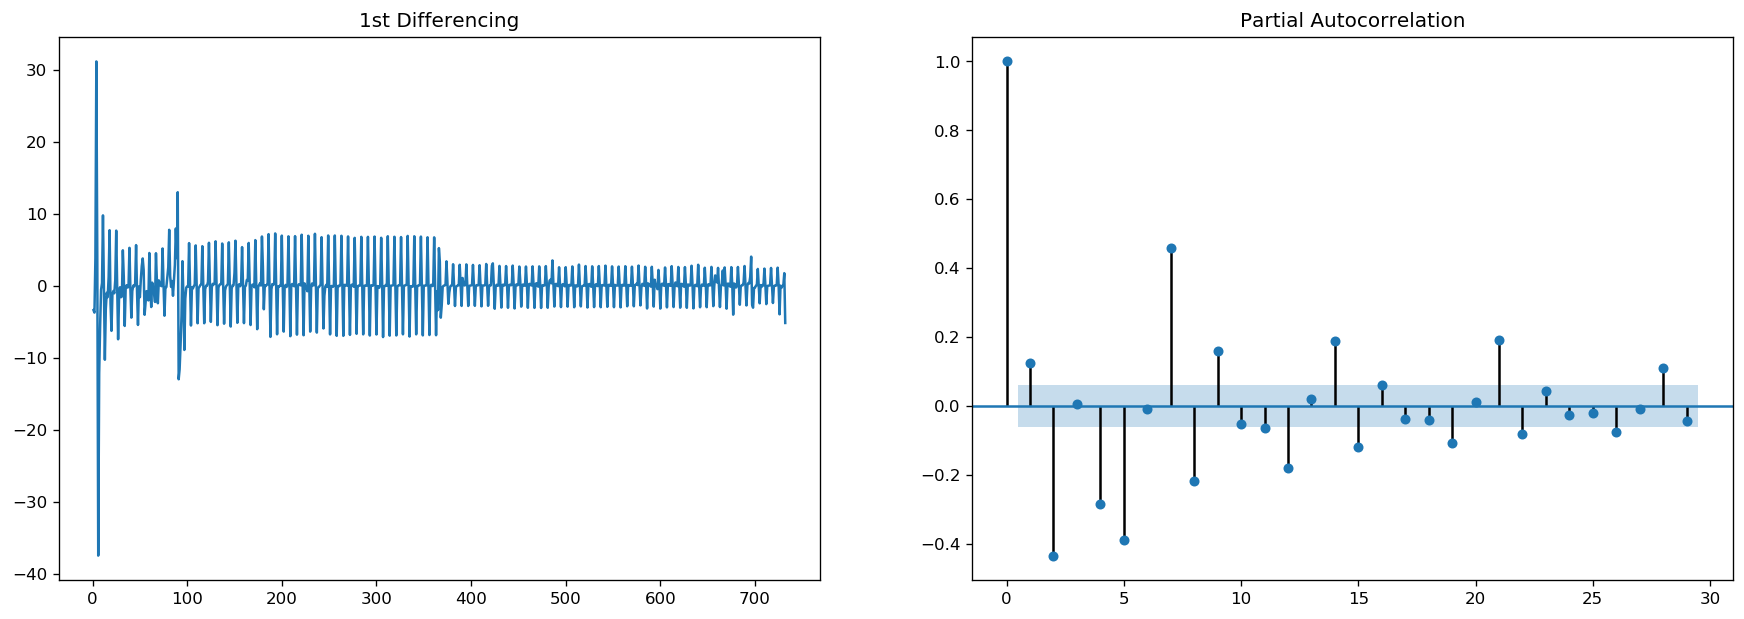

In [203]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# suppress warning
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
import scipy
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(18,6))
axes[0].plot(TS.price.diff())
axes[0].set_title('1st Differencing')
plot_pacf(TS.price.diff().dropna(), ax=axes[1],alpha=0.1) #plot differences between consequtive observations

plt.show()

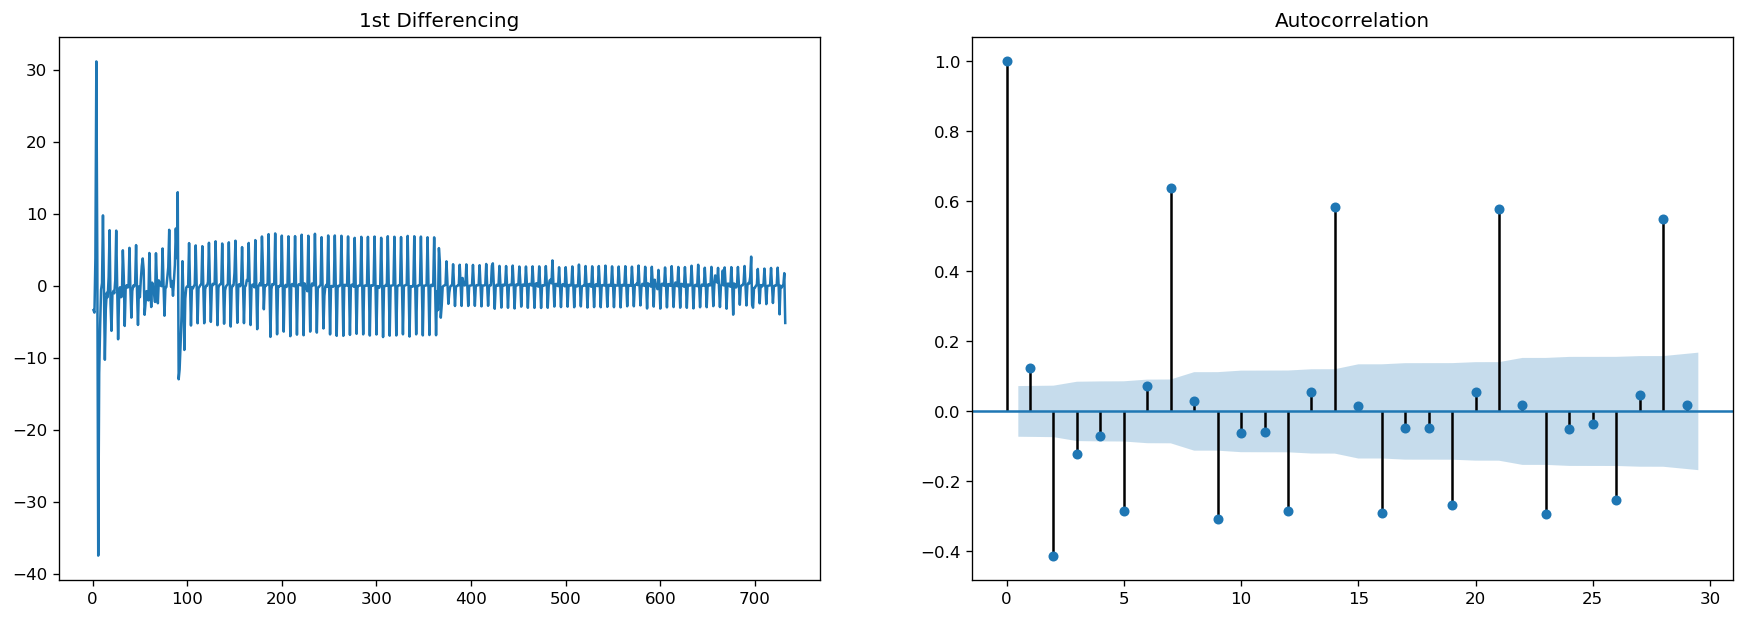

In [204]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
axes[0].plot(TS.price.diff()); axes[0].set_title('1st Differencing')
plot_acf(TS.price.diff().dropna(), ax=axes[1])

plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  513
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -1348.560
Method:                       css-mle   S.D. of innovations              3.350
Date:                Fri, 30 Apr 2021   AIC                           2709.120
Time:                        20:03:45   BIC                           2734.561
Sample:                             1   HQIC                          2719.092
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0413      0.071     -0.584      0.559      -0.180       0.097
ar.L1.D.price     0.1722      0.223      0.772      0.440      -0.265       0.609
ma.L1.D.price    -0.0127      0.221     

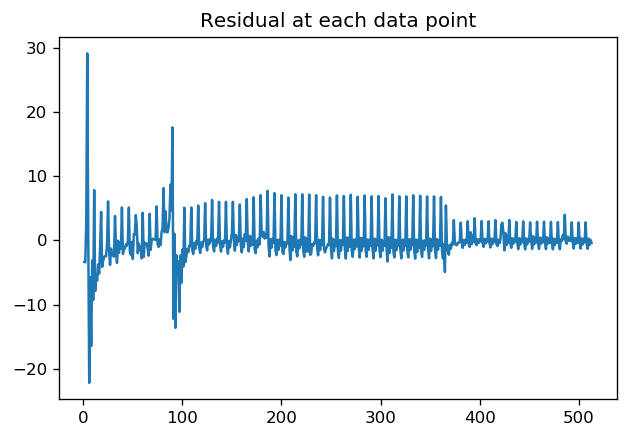

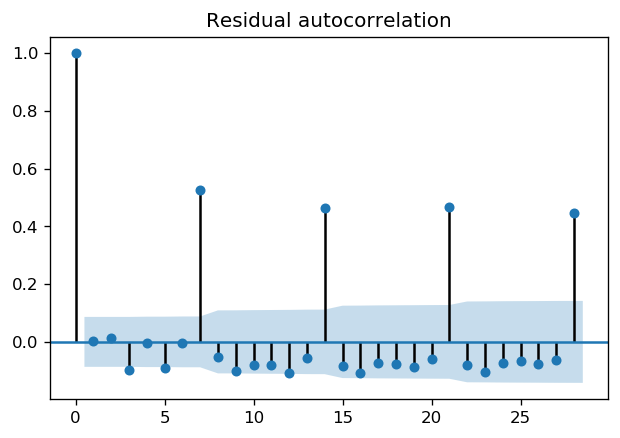

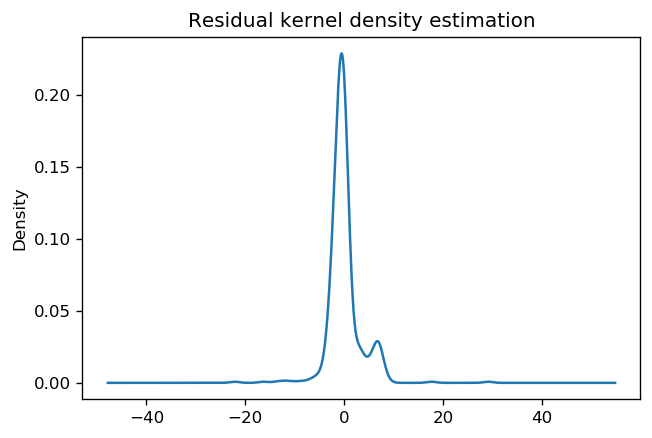

                0
count  513.000000
mean    -0.004912
std      3.381449
min    -22.168152
25%     -1.382319
50%     -0.409830
75%      0.293442
max     29.099094
p value is  1.4716521957722341e-43
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected


In [205]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

P=3
D=1
Q=1

# fit model
N=514  
series = TS['price']
model = ARIMA(series[:N], order=(Q,D,P))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
# plt.figure(figsize = (6,4))
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

In [206]:
TS.date = pd.to_datetime(TS.date)

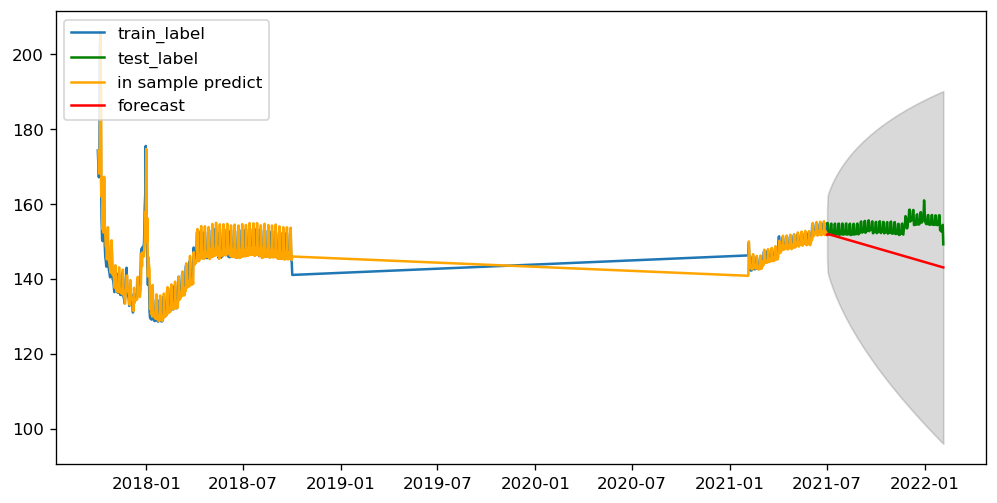

In [209]:
# Forecast
fc, se, conf = model_fit.forecast(steps=len(series)-N, alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=range(N,len(series)))
lower_series = pd.Series(conf[:, 0], index=range(N,len(series)))
upper_series = pd.Series(conf[:, 1], index=range(N,len(series)))

plt.rcParams.update({'figure.figsize':(10,5)})

# plt.plot(series)
fig, ax = plt.subplots()
ax.plot(TS.date[:N+1],series[:N+1],label='train_label')
ax.plot(TS.date[N:],series[N:],color='green',label='test_label')
ax.plot(TS.iloc[1:N+1].date,model_fit.predict(start=1,end=N,dynamic=False,typ='levels'),color='orange',label='in sample predict')
ax.plot(TS.date[N:],fc_series, label='forecast', color='red')
ax.fill_between(TS.iloc[N:].date, lower_series, upper_series, color='k', alpha=.15)
ax.legend(loc='upper left')

In [213]:
mod = sm.tsa.statespace.SARIMAX(TS.price[:514], trend='n', order=(1,1,3), seasonal_order=(1,1,1,7))
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               price   No. Observations:                  514
Model:             SARIMAX(1, 1, 3)x(1, 1, [1], 7)   Log Likelihood               -1132.905
Date:                             Fri, 30 Apr 2021   AIC                           2279.809
Time:                                     20:22:34   BIC                           2309.395
Sample:                                          0   HQIC                          2291.413
                                             - 514                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2279      0.120      1.904      0.057      -0.007       0.463
ma.L1          0.0386      

In [214]:
TS['Spre']=results.predict(start = 514, end= 733, dynamic= True) 
TS

,date,price,DOW,pre,Spre
0,2017-10-02,174.257564,0,166.194342,NaN
1,2017-10-03,170.855638,1,165.630640,NaN
2,2017-10-04,167.109121,2,165.431154,NaN
3,2017-10-05,170.850228,3,165.591029,NaN
4,2017-10-06,201.975173,4,172.497801,NaN
...,...,...,...,...,...
728,2022-02-01,152.675973,1,153.203504,156.203186
729,2022-02-02,152.637873,2,153.004018,156.216351
730,2022-02-03,152.666387,3,153.163892,156.220630
731,2022-02-04,154.395333,4,160.070665,158.949757


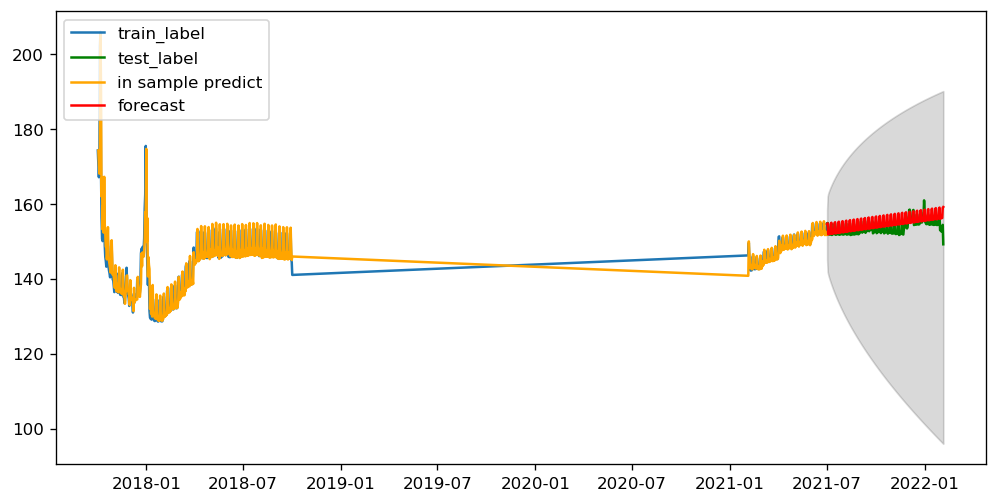

In [215]:
fig, ax = plt.subplots()
ax.plot(TS.date[:N+1],series[:N+1],label='train_label')
ax.plot(TS.date[N:],series[N:],color='green',label='test_label')
ax.plot(TS.iloc[1:N+1].date,model_fit.predict(start=1,end=N,dynamic=False,typ='levels'),color='orange',label='in sample predict')
ax.plot(TS.date[N:],TS.Spre[N:], label='forecast', color='red')
ax.fill_between(TS.iloc[N:].date, lower_series, upper_series, color='k', alpha=.15)
ax.legend(loc='upper left')

In [53]:
df=pd.read_csv('/Users/anboguo/Desktop/ADS/Project/Data/listings.csv')
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210204180331,2021-02-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,10.0,10.0,9.0,NaN,f,2,2,0,0,0.35
1,3831,https://www.airbnb.com/rooms/3831,20210204180331,2021-02-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,10.0,10.0,10.0,NaN,f,1,1,0,0,4.99
2,5121,https://www.airbnb.com/rooms/5121,20210204180331,2021-02-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.35
3,5178,https://www.airbnb.com/rooms/5178,20210204180331,2021-02-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,9.0,10.0,9.0,NaN,f,1,0,1,0,3.31
4,5203,https://www.airbnb.com/rooms/5203,20210204180331,2021-02-06,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,https://www.airbnb.com/users/show/7490,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37007,48033101,https://www.airbnb.com/rooms/48033101,20210204180331,2021-02-06,Cozy One-Bedroom with Full Kitchen Near Manhattan,NaN,NaN,https://a0.muscache.com/pictures/fe6a65ab-b670...,251455701,https://www.airbnb.com/users/show/251455701,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
37008,48033611,https://www.airbnb.com/rooms/48033611,20210204180331,2021-02-06,Grand Concourse Gem,NaN,NaN,https://a0.muscache.com/pictures/16264e28-8d24...,287782529,https://www.airbnb.com/users/show/287782529,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
37009,48038944,https://www.airbnb.com/rooms/48038944,20210204180331,2021-02-06,Natural Light-Filled Home in Upper East Side,"Private room with Queen bed in a 4 bedroom, 4 ...",Welcome to The Upper East Side – located north...,https://a0.muscache.com/pictures/miso/Hosting-...,305240193,https://www.airbnb.com/users/show/305240193,...,NaN,NaN,NaN,NaN,f,181,25,156,0,NaN
37010,48039640,https://www.airbnb.com/rooms/48039640,20210204180331,2021-02-05,Spacious Living in the Heart of Upper East Side,"Private room with Queen bed in a 2 bedroom, 1 ...",Welcome to The Upper East Side – located north...,https://a0.muscache.com/pictures/miso/Hosting-...,305240193,https://www.airbnb.com/users/show/305240193,...,NaN,NaN,NaN,NaN,f,181,25,156,0,NaN


In [54]:
df=pd.read_csv('/Users/anboguo/Desktop/ADS/Project/Data/listings 2.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,100,30,48,2019-11-04,0.35,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,73,1,386,2021-01-27,4.99,1,249
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.35,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,79,2,474,2020-09-25,3.31,1,343
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.85,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37007,48033101,Cozy One-Bedroom with Full Kitchen Near Manhattan,251455701,Alexander,Queens,Woodside,40.74415,-73.90941,Entire home/apt,90,3,0,NaN,NaN,2,365
37008,48033611,Grand Concourse Gem,287782529,Adriana,Bronx,Norwood,40.87575,-73.88399,Private room,520,1,0,NaN,NaN,1,292
37009,48038944,Natural Light-Filled Home in Upper East Side,305240193,June,Manhattan,Midtown,40.75774,-73.96173,Private room,63,30,0,NaN,NaN,181,1
37010,48039640,Spacious Living in the Heart of Upper East Side,305240193,June,Manhattan,Upper East Side,40.76242,-73.95966,Private room,67,30,0,NaN,NaN,181,360


In [16]:
data=df[['listing_id','price']]

In [17]:
listing=pd.read_csv('/Users/anboguo/Desktop/ADS/Project/Data/listings 2.csv')
listing=listing[['id','neighbourhood']]
data=data.merge(listing, left_on='listing_id', right_on='id')
data.head()

,listing_id,price,id,neighbourhood
0,2595,238.0,2595,Midtown
1,2595,238.0,2595,Midtown
2,2595,238.0,2595,Midtown
3,2595,238.0,2595,Midtown
4,2595,238.0,2595,Midtown


In [19]:
neipri=data[['price','neighbourhood']].groupby(by='neighbourhood').mean()
neipri

,price
neighbourhood,
Allerton,109.461830
Arden Heights,96.536496
Arrochar,105.594069
Arverne,252.112270
Astoria,106.627993
...,...
Windsor Terrace,137.294294
Woodhaven,71.467114
Woodlawn,145.434442


In [20]:
neipri.sort_values(by='price',ascending=False)

,price
neighbourhood,
Fort Wadsworth,800.000000
Tribeca,420.536310
Prince's Bay,398.679348
Flatiron District,397.679208
Riverdale,391.359589
...,...
Hunts Point,49.980509
University Heights,49.647573
Soundview,49.532562
